In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import time
import requests

%matplotlib inline

# Source Files

In [11]:
iris_path01 = '../IRIS-GE_2-0__SHP_LAMB93_D092_2020-01-01/IRIS-GE/1_DONNEES_LIVRAISON_2020-07-00352/IRIS-GE_2-0_SHP_LAMB93_D092-2020/IRIS_GE.SHP'
iris_path02 = '../IRIS-GE_2-0__SHP_LAMB93_D075_2020-01-01/IRIS-GE/1_DONNEES_LIVRAISON_2020-07-00352/IRIS-GE_2-0_SHP_LAMB93_D075-2020/IRIS_GE.SHP'
nrg_path01 = '../conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-iris_elect-gas-2019_D92.csv'
nrg_path02 = '../conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-iris_elect-gas-2019_D75.csv'
bd_path = '../BDTOPO_3-0_TOUSTHEMES_SHP_LAMB93_D092_2020-12-15/BDTOPO/1_DONNEES_LIVRAISON_2021-01-00019/BDT_3-0_SHP_LAMB93_D092-ED2020-12-15/BATI/BATIMENT.shp'
bd_path02 = '../BDTOPO_3-0_TOUSTHEMES_SHP_LAMB93_D075_2020-12-15/BDTOPO/1_DONNEES_LIVRAISON_2021-01-00019/BDT_3-0_SHP_LAMB93_D075-ED2020-12-15/BATI/BATIMENT.shp'

# Get IRIS Shape

In [3]:
iris_shp01 = gpd.read_file(iris_path01)
iris_shp02 = gpd.read_file(iris_path02)

print("Hauts-de-Seine: {} IRIS Codes".format(len(iris_shp01)))
print("Paris: {} IRIS Codes".format(len(iris_shp02)))

Hauts-de-Seine: 616 IRIS Codes
Paris: 992 IRIS Codes


In [4]:
iris_shp = iris_shp01.append(iris_shp02)
iris_shp.shape

(1608, 7)

<AxesSubplot:>

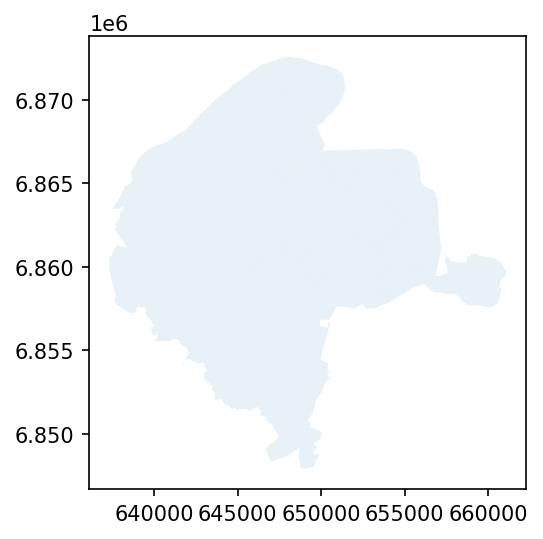

In [5]:
fig, ax = plt.subplots(dpi=150)
iris_shp.plot(ax=ax, alpha = 0.1)

# Get Energy Data directly through the API

In [36]:
def parse_api_response(resp):
    dict01 = {}
    for i in range(resp.json()['nhits']):
        dict01[i] = resp.json()['records'][i]['fields']
        
    return dict01

In [37]:
# a) Department Code = 75 (Paris) and Year = 2019
url = 'https://opendata.agenceore.fr/api/records/1.0/search/?dataset=conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-iris&q=&rows=5000&facet=operateur&facet=annee&facet=filiere&facet=libelle_commune&facet=code_departement&facet=libelle_region&refine.annee=2019&refine.code_departement=75'
response = requests.get(url)

nrg01_api = pd.DataFrame(parse_api_response(response)).T
nrg01_api.head()

,indquali,libelle_epci,indquala,libelle_region,filiere,indqualr,annee,indqualt,pdlt,code_region,...,nombre_maille_secretisees_r,consor,consot,pdlna,thermor,consona,libelle_departement,code_departement,id_filiere,code_iris
0,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.0,2019,0.027,37,11,...,0,1076.61333,1583.70285,0,0.0,0.0,Paris,75,200,751010206
1,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.194,2019,0.0646,247,11,...,0,11592.21019,15931.66782,0,0.0,0.0,Paris,75,200,751010301
2,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.0,2019,0.0667,30,11,...,0,686.50468,1635.7682,0,0.0,0.0,Paris,75,200,751010303
3,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.0722,2019,0.0694,116,11,...,0,5797.38476,7821.03175,0,0.0,0.0,Paris,75,200,751010401
4,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.118,2019,0.0716,105,11,...,0,5509.59739,4663.20101,0,0.0,0.0,Paris,75,200,751010402


In [38]:
# a) Department Code = 92 (Hauts-de-Seine) and Year = 2019
url = 'https://opendata.agenceore.fr/api/records/1.0/search/?dataset=conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-iris&q=&rows=5000&facet=operateur&facet=annee&facet=filiere&facet=libelle_commune&facet=code_departement&facet=libelle_region&refine.annee=2019&refine.code_departement=92'
response = requests.get(url)

nrg02_api = pd.DataFrame(parse_api_response(response)).T
nrg02_api.head()

,indquali,libelle_epci,indquala,libelle_region,filiere,indqualr,annee,indqualt,pdlt,code_region,...,nombre_maille_secretisees_r,consor,consot,pdlna,thermor,consona,libelle_departement,code_departement,id_filiere,code_iris
0,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.0223,2019,0.375,8,11,...,0,8869.94943,2897.48218,0,0.0,0.0,Hauts-de-Seine,92,200,920020101
1,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.0855,2019,0.0,5,11,...,0,6334.27898,451.85636,2,0.0,738.56406,Hauts-de-Seine,92,200,920020102
2,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.819,2019,1.0,2,11,...,0,12840.36833,981.33417,0,0.0,0.0,Hauts-de-Seine,92,200,920020103
3,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.158,2019,0.105,19,11,...,0,5227.17356,2309.34925,0,0.0,0.0,Hauts-de-Seine,92,200,920020107
4,0.0,Métropole du Grand Paris,0.0,Île-de-France,Gaz,0.625,2019,0.999,5,11,...,0,5065.92339,4609.18458,0,0.0,0.0,Hauts-de-Seine,92,200,920020202


In [40]:
print("Hauts-de-Seine: {} rows".format(len(nrg02_api)))
print("Paris: {} rows".format(len(nrg01_api)))

Hauts-de-Seine: 1305 rows
Paris: 1998 rows


In [41]:
nrg_api = nrg01_api.append(nrg02_api)
nrg_api.shape

(3303, 37)

In [42]:
# Select Columns of Interest:

nrg_api = nrg_api[['code_iris', 'operateur', 'filiere','consor']]

nrg_api.rename(columns={"code_iris":"CODE_IRIS", "consor":"Consommation Résidentiel  (MWh)",}, inplace=True)

nrg_api.tail()

,CODE_IRIS,operateur,filiere,Consommation Résidentiel (MWh)
1300,920770106,GRDF,Gaz,10601.33454
1301,920240201,GRT Gaz,Gaz,0.0
1302,920250208,GRT Gaz,Gaz,0.0
1303,920360404,GRT Gaz,Gaz,0.0
1304,920500704,GRT Gaz,Gaz,0.0


In [43]:
nrg = nrg.groupby(['CODE_IRIS']).sum()  
nrg = nrg.reset_index()
nrg.head()

,CODE_IRIS,Consommation Résidentiel (MWh)
0,751010101,5080.579650
1,751010102,1102.508535
2,751010103,2133.403236
3,751010104,0.000000
4,751010105,0.000000


# Get Energy Data

In [6]:
nrg01 = pd.read_csv(nrg_path01, sep = ";")
nrg02 = pd.read_csv(nrg_path02, sep = ";")

print("Hauts-de-Seine: {} rows".format(len(nrg01)))
print("Paris: {} rows".format(len(nrg02)))

Hauts-de-Seine: 1305 rows
Paris: 1998 rows


In [7]:
nrg = nrg01.append(nrg02)
nrg.shape

(3303, 37)

In [8]:
# Select Columns of Interest:

nrg = nrg[['Code IRIS', 'Opérateur', 'Filière','Consommation Résidentiel  (MWh)']]

nrg.rename(columns={"Code IRIS":"CODE_IRIS"}, inplace=True)

nrg.tail()

,CODE_IRIS,Opérateur,Filière,Consommation Résidentiel (MWh)
1993,751208019,GRDF,Gaz,12500.02609
1994,751208025,GRDF,Gaz,2158.05154
1995,75120XXXX,GRDF,Gaz,542.69941
1996,751135032,GRT Gaz,Gaz,0.00000
1997,751145403,RTE,Electricité,0.00000


In [9]:
## rearrange table to facilitate join
# Add up the energy from all providers, on the IRIS level
# nrg = nrg.groupby(['CODE_IRIS', 'Filière']).sum()  
# use this line (above) instead of next one (below) to separate gas and electric 

nrg = nrg.groupby(['CODE_IRIS']).sum()  
nrg = nrg.reset_index()
nrg.head()

,CODE_IRIS,Consommation Résidentiel (MWh)
0,751010101,5080.579650
1,751010102,1102.508535
2,751010103,2133.403236
3,751010104,0.000000
4,751010105,0.000000


In [10]:
# ## rearrange table to facilitate join
# # split table in two, one for each energy type
# nrgEl = nrg[nrg['Filière']== 'Electricité']
# nrgGaz = nrg[nrg['Filière']== 'Gaz']

# print("Gaz: {}".format(nrgGaz.shape))
# print("Electricitè: {}".format(nrgEl.shape))

# Get BD Topo data

In [11]:
start_time = time.time()

bd = gpd.read_file(bd_path)
bd2 = gpd.read_file(bd_path02)

bd = bd.append(bd2)

print("--- runtime: %.08s seconds ---" % (time.time() - start_time))

bd.shape

--- runtime: 181.7161 seconds ---


(1305755, 26)

In [12]:
# bd = bd.iloc[::10,:]
# bd.shape

## Data Prep in BD Topo

In [13]:
# only residential buildings
print("{} total buildings".format(len(bd)))
bd = bd[(bd.USAGE1 == 'Résidentiel') | (bd.USAGE2 == 'Résidentiel')]

print("{} Residential buildings".format(len(bd)))

1305755 total buildings
908198 Residential buildings


In [14]:
# fig, ax = plt.subplots(dpi=200)
# bd.iloc[::5,:].plot(ax=ax, color='black')
# # plt.xlim([640000, 650000])
# plt.ylim([6.846e6, 6.875e6])

# iris_shp.plot(ax=ax, alpha = 0.2)

In [15]:
# Make Area Explicit
bd['area_m2'] = bd.geometry.area

### Construction Date

In [16]:
# Make a numeric field for Construction Date
bd['CONST_YR'] = np.nan

bd.loc[~bd.DATE_APP.isna(), 'CONST_YR'] = bd.loc[~bd.DATE_APP.isna(), :].DATE_APP.str.split("-", expand=True)[0].astype('int')

In [17]:
bd.head()

,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,...,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,geometry,area_m2,CONST_YR
0,BATIMENT0000000244196131,Indifférenciée,Résidentiel,None,Non,En service,2010-10-05 14:39:55,2019-03-15 18:08:31,1954-01-01,None,...,5.7,48.9,54.6,57.2,48.9,Cadastre,A 1.0,"POLYGON Z ((650623.500 6853236.300 54.600, 650...",87.360,1954.0
2,BATIMENT0000000244196760,Indifférenciée,Résidentiel,None,Non,En service,2010-10-05 14:39:55,2019-03-15 18:08:31,1977-01-01,None,...,7.4,49.9,57.3,60.2,51.6,Cadastre,A 1.0,"POLYGON Z ((650665.300 6853228.600 57.300, 650...",107.275,1977.0
3,BATIMENT0000000244196887,Indifférenciée,Résidentiel,Annexe,Non,En service,2010-10-05 14:39:55,2019-03-15 18:08:31,1978-01-01,None,...,7.1,48.5,55.6,58.0,49.8,Cadastre,A 1.0,"POLYGON Z ((650745.300 6853710.500 55.600, 650...",98.755,1978.0
4,BATIMENT0000000244197279,Indifférenciée,Résidentiel,Annexe,Non,En service,2010-10-05 14:40:24,2019-03-15 18:08:31,1958-01-01,None,...,2.5,93.0,95.5,96.6,NaN,Cadastre,A 1.0,"POLYGON Z ((652082.800 6853426.600 95.500, 652...",103.880,1958.0
5,BATIMENT0000000244197295,Indifférenciée,Résidentiel,Annexe,Non,En service,2010-10-05 14:40:24,2019-03-15 18:08:31,1956-01-01,None,...,13.3,91.7,105.0,105.7,91.8,Cadastre,A 1.0,"POLYGON Z ((652217.900 6853363.800 105.000, 65...",312.730,1956.0


In [18]:
# Get fields of interest
bd = bd[['ID', 'USAGE1', 'USAGE2', 'CONST_YR', 'NB_LOGTS',
         'NB_ETAGES','HAUTEUR', 'area_m2','geometry']]
bd.head()

,ID,USAGE1,USAGE2,CONST_YR,NB_LOGTS,NB_ETAGES,HAUTEUR,area_m2,geometry
0,BATIMENT0000000244196131,Résidentiel,None,1954.0,1.0,2.0,5.7,87.360,"POLYGON Z ((650623.500 6853236.300 54.600, 650..."
2,BATIMENT0000000244196760,Résidentiel,None,1977.0,1.0,2.0,7.4,107.275,"POLYGON Z ((650665.300 6853228.600 57.300, 650..."
3,BATIMENT0000000244196887,Résidentiel,Annexe,1978.0,2.0,2.0,7.1,98.755,"POLYGON Z ((650745.300 6853710.500 55.600, 650..."
4,BATIMENT0000000244197279,Résidentiel,Annexe,1958.0,1.0,1.0,2.5,103.880,"POLYGON Z ((652082.800 6853426.600 95.500, 652..."
5,BATIMENT0000000244197295,Résidentiel,Annexe,1956.0,16.0,4.0,13.3,312.730,"POLYGON Z ((652217.900 6853363.800 105.000, 65..."


In [19]:
(bd.HAUTEUR//3).isna().sum()

2155

In [20]:
# fillna in Number of Floors
# In case of missing values for Number of Floors, 
# The value of hight is taken into account and the number of floors is calculated as 
# NF =  H // 3 
print("{} missing N Floors.".format(bd.NB_ETAGES.isna().sum()))

bd['NB_ETAGES'] = bd.NB_ETAGES.fillna(bd.HAUTEUR//3)
bd['NB_ETAGES'] = bd.NB_ETAGES.replace(to_replace=0, value=1)
bd['NB_ETAGES'] = bd.NB_ETAGES.fillna(1)

print("{} missing N Floors.".format(bd.NB_ETAGES.isna().sum()))

246878 missing N Floors.
0 missing N Floors.


# Merge Data sets

## IRIS and Energy

In [21]:
iris = pd.merge(iris_shp, nrg, how='left', on='CODE_IRIS')
iris.head()

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,Consommation Résidentiel (MWh)
0,92025,Colombes,0202,920250202,Fossés-Jean Nord-Gymnase-Parc Caillebotte,H,"POLYGON ((646346.500 6870253.800, 646281.000 6...",3278.258028
1,92025,Colombes,0203,920250203,Fossés-Jean Sud,H,"POLYGON ((646371.100 6870190.000, 646367.500 6...",3914.743227
2,92063,Rueil-Malmaison,0401,920630401,Pince Vins,H,"POLYGON ((637646.800 6862501.400, 637721.400 6...",39492.696918
3,92025,Colombes,0201,920250201,Fossés-Jean Nord-Stalingrad-Tour Z,H,"POLYGON ((646273.700 6870443.900, 646251.100 6...",2129.258252
4,92063,Rueil-Malmaison,0301,920630301,Closeaux 1,H,"POLYGON ((638162.500 6863614.300, 638135.300 6...",11085.526618


In [22]:
iris = iris[['CODE_IRIS', 'Consommation Résidentiel  (MWh)', 'geometry']]
iris.head()

,CODE_IRIS,Consommation Résidentiel (MWh),geometry
0,920250202,3278.258028,"POLYGON ((646346.500 6870253.800, 646281.000 6..."
1,920250203,3914.743227,"POLYGON ((646371.100 6870190.000, 646367.500 6..."
2,920630401,39492.696918,"POLYGON ((637646.800 6862501.400, 637721.400 6..."
3,920250201,2129.258252,"POLYGON ((646273.700 6870443.900, 646251.100 6..."
4,920630301,11085.526618,"POLYGON ((638162.500 6863614.300, 638135.300 6..."


In [23]:
iris.shape

(1608, 3)

## BD TOPO and IRIS

In [24]:
# Spatial Join
start_time = time.time()

bd = gpd.sjoin(bd, iris, how='left', op='intersects')

print("--- runtime: %.08s seconds ---" % (time.time() - start_time))
print(bd.shape)

bd.head()

--- runtime: 155.2735 seconds ---
(908793, 12)


,ID,USAGE1,USAGE2,CONST_YR,NB_LOGTS,NB_ETAGES,HAUTEUR,area_m2,geometry,index_right,CODE_IRIS,Consommation Résidentiel (MWh)
0,BATIMENT0000000244196131,Résidentiel,None,1954.0,1.0,2.0,5.7,87.360,"POLYGON Z ((650623.500 6853236.300 54.600, 650...",NaN,NaN,NaN
2,BATIMENT0000000244196760,Résidentiel,None,1977.0,1.0,2.0,7.4,107.275,"POLYGON Z ((650665.300 6853228.600 57.300, 650...",NaN,NaN,NaN
3,BATIMENT0000000244196887,Résidentiel,Annexe,1978.0,2.0,2.0,7.1,98.755,"POLYGON Z ((650745.300 6853710.500 55.600, 650...",NaN,NaN,NaN
4,BATIMENT0000000244197279,Résidentiel,Annexe,1958.0,1.0,1.0,2.5,103.880,"POLYGON Z ((652082.800 6853426.600 95.500, 652...",NaN,NaN,NaN
5,BATIMENT0000000244197295,Résidentiel,Annexe,1956.0,16.0,4.0,13.3,312.730,"POLYGON Z ((652217.900 6853363.800 105.000, 65...",NaN,NaN,NaN


In [25]:
# Discard buildings out of the IRIS Maps (Could have done an INNER JOIN instead)
bd = bd[~bd.CODE_IRIS.isna()]
bd.shape

(468468, 12)

In [26]:
# Discarding "duplicate buildings that intersected two IRIS polygons"
print("Before dropping dulicates: {}".format(len(bd)))

bd.drop_duplicates(['ID'], keep='first', inplace=True)

print("After dropping dulicates: {}".format(len(bd)))

Before dropping dulicates: 468468
After dropping dulicates: 256406


<AxesSubplot:>

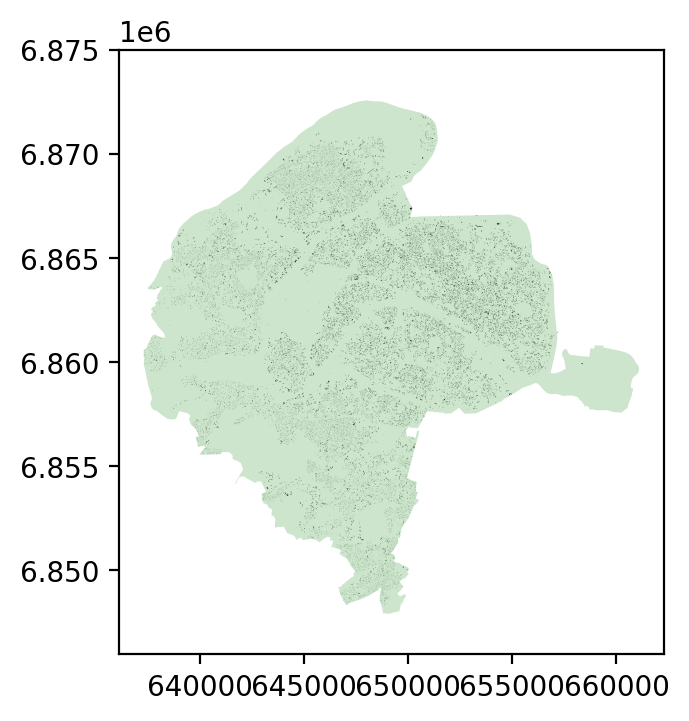

In [27]:
fig, ax = plt.subplots(dpi=200)
bd.iloc[::5,:].plot(ax=ax, color='black')
# plt.xlim([640000, 650000])
plt.ylim([6.846e6, 6.875e6])

iris_shp.plot(ax=ax, alpha = 0.2, color='green')

# Find Neighbors to Estimate Construction Year

In [28]:
##avg_const = bd.groupby(['CODE_IRIS'])[['CONST_YR']].agg(np.mean)

In [29]:
bd.columns

Index(['ID', 'USAGE1', 'USAGE2', 'CONST_YR', 'NB_LOGTS', 'NB_ETAGES',
       'HAUTEUR', 'area_m2', 'geometry', 'index_right', 'CODE_IRIS',
       'Consommation Résidentiel  (MWh)'],
      dtype='object')

In [30]:
bd = bd[['ID', 'USAGE1', 'USAGE2', 'CONST_YR', 'NB_LOGTS', 'NB_ETAGES',
       'HAUTEUR', 'area_m2', 'geometry', 'CODE_IRIS',
       'Consommation Résidentiel  (MWh)']]

In [31]:
#split df in 'dated' and 'non-dated'
bdm = bd[bd.CONST_YR.isna()].copy()
bdf = bd[~bd.CONST_YR.isna()].copy()

In [32]:
#create buffer of 50 m around buildings without Construction date
bdm['geometry'] = bdm.geometry.buffer(distance = 100)

In [33]:
# Spatial join to find buildings within the buffer
avg_const = gpd.sjoin(bdm, bdf, how='left', op='intersects')

In [34]:
#avg_const.head()

In [35]:
#avg_const.shape

In [36]:
avg_const = avg_const.groupby(['ID_left'])[['CONST_YR_right']].agg(np.mean)

In [37]:
len(bdm)

83769

In [38]:
avg_const.isna().sum()

CONST_YR_right    542
dtype: int64

In [39]:
avg_const.reset_index(inplace=True)

In [40]:
avg_const.rename(columns={'ID_left':'ID', 'CONST_YR_right':'CONST_YR_E' }, inplace=True)
avg_const.head()

,ID,CONST_YR_E
0,BATIMENT0000000000149816,NaN
1,BATIMENT0000000000149847,NaN
2,BATIMENT0000000000150065,1912.000000
3,BATIMENT0000000000150140,1984.750000
4,BATIMENT0000000000150207,1928.457143


In [41]:
#bd = bd.drop(columns=['CONST_YR_E_x', 'CONST_YR_E_y'])

In [42]:
bd = pd.merge(bd, avg_const, how='left', on='ID')
bd.head()

,ID,USAGE1,USAGE2,CONST_YR,NB_LOGTS,NB_ETAGES,HAUTEUR,area_m2,geometry,CODE_IRIS,Consommation Résidentiel (MWh),CONST_YR_E
0,BATIMENT0000000240146969,Résidentiel,None,NaN,NaN,5.0,16.4,190.000,"POLYGON Z ((643784.900 6857869.400 95.700, 643...",920480204,15082.133573,1952.086957
1,BATIMENT0000000240149243,Résidentiel,None,1987.0,0.0,1.0,9.7,153.955,"POLYGON Z ((644916.800 6857223.800 94.900, 644...",920480207,11873.582752,NaN
2,BATIMENT0000002200277869,Résidentiel,None,NaN,NaN,1.0,NaN,633.225,"POLYGON Z ((646385.200 6868676.200 -1000.000, ...",920090109,14965.925716,1915.081081
3,BATIMENT0000002200279347,Résidentiel,None,NaN,NaN,1.0,NaN,1100.655,"POLYGON Z ((643250.300 6854078.300 -1000.000, ...",920480102,2273.182134,1983.333333
4,BATIMENT0000002200279348,Résidentiel,None,NaN,NaN,1.0,NaN,1497.275,"POLYGON Z ((643276.700 6854088.400 -1000.000, ...",920480102,2273.182134,1978.400000


# Final Calculations on bd gdf

In [43]:
# Filling Missing Construction Year
print("Missing CONST_YR values before: {}".format(bd.CONST_YR.isna().sum()))

bd.loc[bd.CONST_YR.isna(), 'CONST_YR'] = bd.loc[bd.CONST_YR.isna(), 'CONST_YR_E']

print("Missing CONST_YR values before: {}".format(bd.CONST_YR.isna().sum()))

Missing CONST_YR values before: 83769
Missing CONST_YR values before: 542


In [44]:
# fillna 'None' with string 'NA' to avoid errors ahead
#print("Missing USAGE1 values: {}".format(bd.USAGE1.isna().sum()))
print("Missing USAGE2 values before: {}".format(bd.USAGE2.isna().sum()))
bd.USAGE2.fillna(value='NA', inplace=True)
print("Missing USAGE2 values after: {}".format(bd.USAGE2.isna().sum()))

Missing USAGE2 values before: 154040
Missing USAGE2 values after: 0


In [45]:
# GFA_RESID
bd['GFA_RESID'] = np.zeros(len(bd))

start_time = time.time()

for i in bd.index.tolist():
    
    ### GFA
    # If there is no secundary usage or no secodary floor, 
    # all area (all floors) is (are) assumed to be residential
    if bd.loc[i,'USAGE2'] == 'NA':
        bd.loc[i,'GFA_RESID'] =  bd.loc[i,'area_m2'] * bd.loc[i,'NB_ETAGES']
    elif  (bd.loc[i,'NB_ETAGES'] <= 1):
        bd.loc[i,'GFA_RESID'] =  bd.loc[i,'area_m2'] * bd.loc[i,'NB_ETAGES']
        
    # Otherwise the total GFA_Residential is calculated as (NB_ETAGES - 1) * surace_area (area_m2)
    else:
        bd.loc[i,'GFA_RESID'] =  bd.loc[i,'area_m2'] * (bd.loc[i,'NB_ETAGES'] - 1)

print("--- runtime: %.08s seconds ---" % (time.time() - start_time))

--- runtime: 714.2899 seconds ---


In [46]:
# for buildings with no information about number of floors or number of logements
# an Area threshold is assumed to infer if the building is single-family or multi-family

AREA_thres = 250

print("Missing NB_LOGTS values before: {}".format(bd.NB_LOGTS.isna().sum()))

bd.NB_LOGTS.loc[bd.area_m2 < AREA_thres] = bd.NB_LOGTS.loc[bd.area_m2 < AREA_thres].fillna(value=1)
bd.NB_LOGTS.loc[bd.area_m2 >= AREA_thres] = bd.NB_LOGTS.loc[bd.area_m2 >= AREA_thres].fillna(value=2)

print("Missing NB_LOGTS values after: {}".format(bd.NB_LOGTS.isna().sum()))

Missing NB_LOGTS values before: 73569
Missing NB_LOGTS values after: 0


C:\Users\victo\anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\victo\anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [47]:
#IDX_FACTOR
bd['IDX_FCTR_L'] = np.zeros(len(bd))
bd['IDX_FCTR_S'] = np.zeros(len(bd))

start_time = time.time()

for i in bd.index.tolist():
    
    ### IDX_FACTOR
    # Check number of logement
    if bd.loc[i,'NB_LOGTS'] > 1:
        if bd.loc[i,'CONST_YR'] > 1975:
            bd.loc[i, 'IDX_FCTR_L'] = 100
            bd.loc[i, 'IDX_FCTR_S'] = 100
        else:
            bd.loc[i, 'IDX_FCTR_L'] = 130
            bd.loc[i, 'IDX_FCTR_S'] = 120
            
    else:
        if bd.loc[i,'CONST_YR'] > 1975:
            bd.loc[i, 'IDX_FCTR_L'] = 180
            bd.loc[i, 'IDX_FCTR_S'] = 120
        else:
            bd.loc[i, 'IDX_FCTR_L'] = 200
            bd.loc[i, 'IDX_FCTR_S'] = 144
            

print("--- runtime: %.08s seconds ---" % (time.time() - start_time))
        

--- runtime: 1283.638 seconds ---


In [48]:
bd['BD_Cons'] = np.zeros(len(bd))

start_time = time.time()

for cd in bd.CODE_IRIS.unique().tolist():
    df = bd[bd.CODE_IRIS == cd]
    df.loc[:,'BD_Cons'] = df.GFA_RESID * df.IDX_FCTR_S /(df.GFA_RESID * df.IDX_FCTR_S).sum() * df['Consommation Résidentiel  (MWh)']
    bd.loc[df.index, 'BD_Cons'] = df.loc[:,'BD_Cons']

print("--- runtime: %.08s seconds ---" % (time.time() - start_time))

C:\Users\victo\anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


--- runtime: 70.69605 seconds ---


In [49]:
bd.head()

,ID,USAGE1,USAGE2,CONST_YR,NB_LOGTS,NB_ETAGES,HAUTEUR,area_m2,geometry,CODE_IRIS,Consommation Résidentiel (MWh),CONST_YR_E,GFA_RESID,IDX_FCTR_L,IDX_FCTR_S,BD_Cons
0,BATIMENT0000000240146969,Résidentiel,NA,1952.086957,1.0,5.0,16.4,190.000,"POLYGON Z ((643784.900 6857869.400 95.700, 643...",920480204,15082.133573,1952.086957,950.000,200.0,144.0,148.059787
1,BATIMENT0000000240149243,Résidentiel,NA,1987.000000,0.0,1.0,9.7,153.955,"POLYGON Z ((644916.800 6857223.800 94.900, 644...",920480207,11873.582752,NaN,153.955,180.0,120.0,16.470574
2,BATIMENT0000002200277869,Résidentiel,NA,1915.081081,2.0,1.0,NaN,633.225,"POLYGON Z ((646385.200 6868676.200 -1000.000, ...",920090109,14965.925716,1915.081081,633.225,130.0,120.0,81.965719
3,BATIMENT0000002200279347,Résidentiel,NA,1983.333333,2.0,1.0,NaN,1100.655,"POLYGON Z ((643250.300 6854078.300 -1000.000, ...",920480102,2273.182134,1983.333333,1100.655,100.0,100.0,27.656800
4,BATIMENT0000002200279348,Résidentiel,NA,1978.400000,2.0,1.0,NaN,1497.275,"POLYGON Z ((643276.700 6854088.400 -1000.000, ...",920480102,2273.182134,1978.400000,1497.275,100.0,100.0,37.622902


## Rearrange and prepare to generate shapefile 

In [50]:
bd.columns

Index(['ID', 'USAGE1', 'USAGE2', 'CONST_YR', 'NB_LOGTS', 'NB_ETAGES',
       'HAUTEUR', 'area_m2', 'geometry', 'CODE_IRIS',
       'Consommation Résidentiel  (MWh)', 'CONST_YR_E', 'GFA_RESID',
       'IDX_FCTR_L', 'IDX_FCTR_S', 'BD_Cons'],
      dtype='object')

In [51]:
bd.rename(columns={'Consommation Résidentiel  (MWh)':'IrisConsRes'}, inplace=True)
bd = bd[['ID', 'USAGE1', 'USAGE2', 'CONST_YR', 'NB_LOGTS', 'NB_ETAGES',
       'HAUTEUR', 'area_m2', 'CODE_IRIS', 'IrisConsRes', 'CONST_YR_E', 'GFA_RESID',
       'IDX_FCTR_L', 'IDX_FCTR_S', 'BD_Cons', 'geometry']]
bd.head()

,ID,USAGE1,USAGE2,CONST_YR,NB_LOGTS,NB_ETAGES,HAUTEUR,area_m2,CODE_IRIS,IrisConsRes,CONST_YR_E,GFA_RESID,IDX_FCTR_L,IDX_FCTR_S,BD_Cons,geometry
0,BATIMENT0000000240146969,Résidentiel,NA,1952.086957,1.0,5.0,16.4,190.000,920480204,15082.133573,1952.086957,950.000,200.0,144.0,148.059787,"POLYGON Z ((643784.900 6857869.400 95.700, 643..."
1,BATIMENT0000000240149243,Résidentiel,NA,1987.000000,0.0,1.0,9.7,153.955,920480207,11873.582752,NaN,153.955,180.0,120.0,16.470574,"POLYGON Z ((644916.800 6857223.800 94.900, 644..."
2,BATIMENT0000002200277869,Résidentiel,NA,1915.081081,2.0,1.0,NaN,633.225,920090109,14965.925716,1915.081081,633.225,130.0,120.0,81.965719,"POLYGON Z ((646385.200 6868676.200 -1000.000, ..."
3,BATIMENT0000002200279347,Résidentiel,NA,1983.333333,2.0,1.0,NaN,1100.655,920480102,2273.182134,1983.333333,1100.655,100.0,100.0,27.656800,"POLYGON Z ((643250.300 6854078.300 -1000.000, ..."
4,BATIMENT0000002200279348,Résidentiel,NA,1978.400000,2.0,1.0,NaN,1497.275,920480102,2273.182134,1978.400000,1497.275,100.0,100.0,37.622902,"POLYGON Z ((643276.700 6854088.400 -1000.000, ..."


## Plots for consistency check

--- runtime: 13.26516 seconds ---


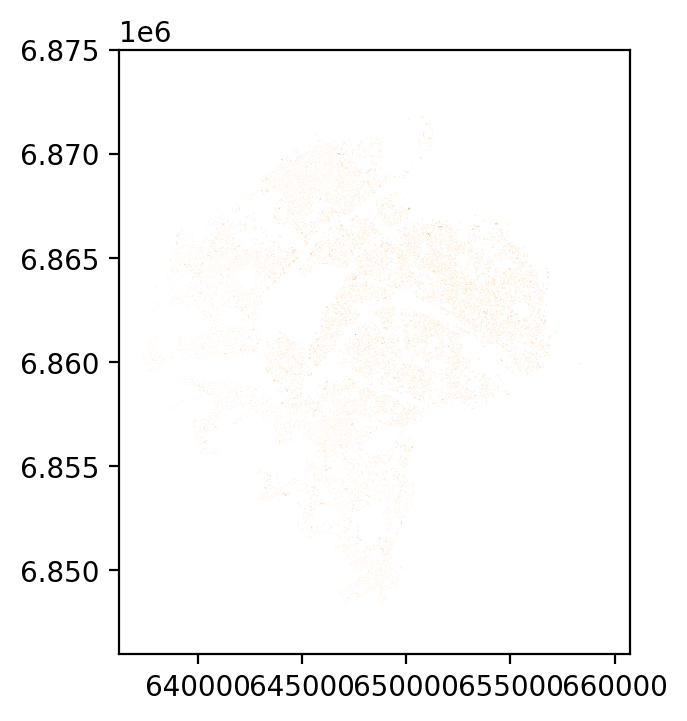

In [52]:
start_time = time.time()

fig, ax = plt.subplots(dpi=200)

#iris_shp.plot(ax=ax, alpha = 0.05, color='green', linewidth=5)
bd.iloc[::5,:].plot(ax=ax, column='BD_Cons', cmap='copper_r')
#plt.xlim([643000, 646000])
plt.ylim([6.846e6, 6.875e6])

print("--- runtime: %.08s seconds ---" % (time.time() - start_time))

(6858500.0, 6861500.0)

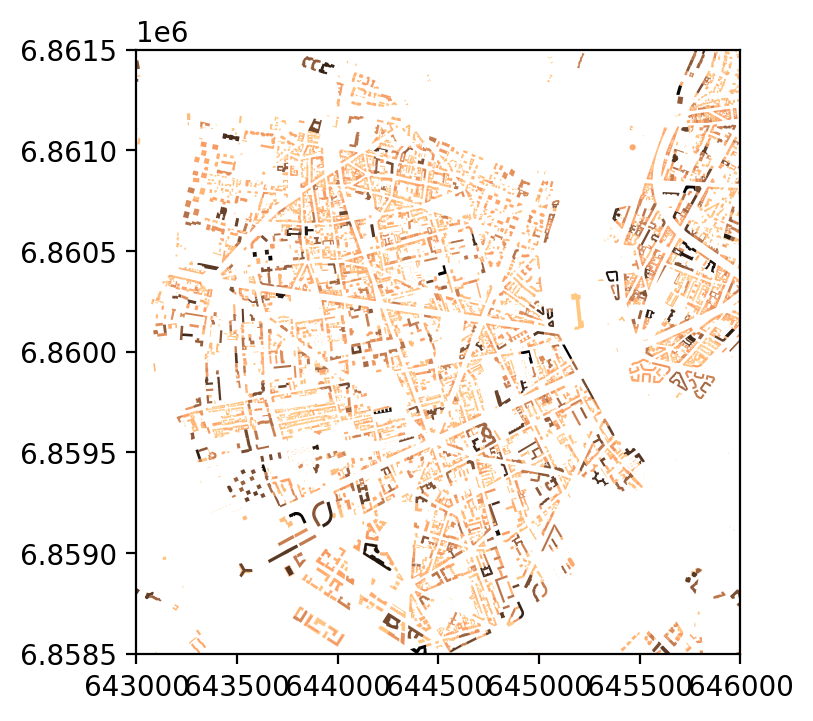

In [60]:
fig, ax = plt.subplots(dpi=200)

#iris_shp.plot(ax=ax, alpha = 0.05, color='green', linewidth=5)
#bd.iloc[::5,:].plot(ax=ax, column='BD_Cons', cmap='copper_r')
bd[bd.BD_Cons<1000].plot(ax=ax, column='BD_Cons', cmap='copper_r')
plt.xlim([643000, 646000])
plt.ylim([6.8585e6, 6.8615e6])


## Write to shapefile

In [54]:
start_time = time.time()

bd.to_file('../Nexqt/Bldgs_France.shp')

print("--- runtime: %.08s seconds ---" % (time.time() - start_time))

<ipython-input-54-48936fa04acc>:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  bd.to_file('../Nexqt/Bldgs_France.shp')


--- runtime: 115.5929 seconds ---
